# 宏观经济学

# 10年股市数据

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Arial Unicode MS'
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [3]:
origin = pd.read_csv('share.csv')
origin = origin[0:-2]
origin = origin.iloc[::-1]
origin

,日期,收盘,开盘,高,低,交易量,涨跌幅
2447,2011年6月13日,"2,700.38","2,687.65","2,703.42","2,669.40",6.31B,-0.18
2446,2011年6月14日,"2,730.04","2,696.22","2,735.55","2,691.67",8.31B,1.10
2445,2011年6月15日,"2,705.43","2,717.68","2,730.48","2,705.07",7.49B,-0.90
2444,2011年6月16日,"2,664.28","2,685.63","2,691.94","2,663.12",7.09B,-1.52
2443,2011年6月17日,"2,642.82","2,661.41","2,675.03","2,641.39",6.44B,-0.81
...,...,...,...,...,...,...,...
4,2021年6月28日,"3,606.37","3,612.25","3,614.36","3,594.22",32.13B,-0.03
3,2021年6月29日,"3,573.18","3,601.68","3,601.83","3,570.53",30.61B,-0.92
2,2021年6月30日,"3,591.20","3,572.62","3,594.12","3,569.50",26.82B,0.50
1,2021年7月1日,"3,588.78","3,600.55","3,607.70","3,573.94",29.19B,-0.07


## 数据处理

## 正则处理时间

In [4]:
import re

pattern = re.compile(r'^(\w+)年(\w+)月(\w+)日$')
res = pattern.match("2021年7月2日")
res.group(1)

'2021'

In [5]:
def to_datetime(s):
    """
    改成时间格式
    """
    res = pattern.match(s)
    return pd.to_datetime('%s-%s-%s' % (res.group(1), res.group(2), res.group(3)))

In [6]:
share = origin.loc[:,('开盘', '收盘', '高', '低')].replace(',','', regex=True).astype('float')
time = origin['日期'].apply(to_datetime)
share.index = time
share

,开盘,收盘,高,低
日期,,,,
2011-06-13,2687.65,2700.38,2703.42,2669.40
2011-06-14,2696.22,2730.04,2735.55,2691.67
2011-06-15,2717.68,2705.43,2730.48,2705.07
2011-06-16,2685.63,2664.28,2691.94,2663.12
2011-06-17,2661.41,2642.82,2675.03,2641.39
...,...,...,...,...
2021-06-28,3612.25,3606.37,3614.36,3594.22
2021-06-29,3601.68,3573.18,3601.83,3570.53
2021-06-30,3572.62,3591.20,3594.12,3569.50


In [7]:
quan = origin.loc[:,('交易量')].replace('B','', regex=True).astype('float')
quan.index = time
quan

日期
2011-06-13     6.31
2011-06-14     8.31
2011-06-15     7.49
2011-06-16     7.09
2011-06-17     6.44
              ...  
2021-06-28    32.13
2021-06-29    30.61
2021-06-30    26.82
2021-07-01    29.19
2021-07-02    29.19
Name: 交易量, Length: 2448, dtype: float64

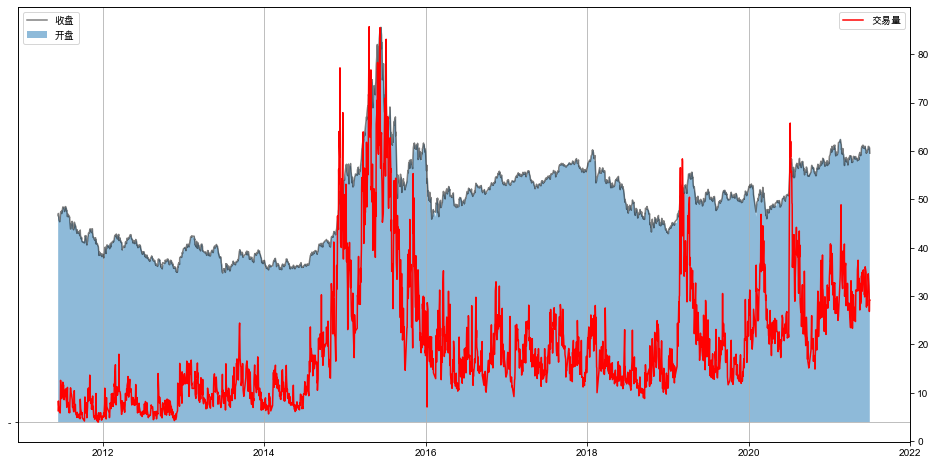

In [8]:
fig, ax = plt.subplots(figsize=(16,8))
ax.grid()
ax2 = ax.twinx()
ax.fill_between(time, share['开盘'], '-', label='开盘', alpha=0.5)
ax.plot(time, share['收盘'], '-', color="k", label='收盘', alpha=0.5)
ax.legend(loc=2)
ax2.plot(quan, color="r", label="交易量")
# ax2.plot(quan, '-',color='y',linewidth=1, label="交易量")
ax2.legend(loc=1)


# 时间序列分析

## 自相关性

/Users/thales/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([1.        , 0.99631157, 0.99262134, 0.98913832, 0.98565268,
       0.98162599, 0.97768497, 0.9740862 , 0.97010625, 0.96577995,
       0.96139583, 0.95750274, 0.95379562, 0.94984327, 0.94579142,
       0.94204035, 0.93829461, 0.93438266, 0.93025611, 0.92639184,
       0.92262664, 0.91826125, 0.91359075, 0.90917446, 0.90529816,
       0.90148518, 0.89745408, 0.89347777, 0.88982622, 0.88604017,
       0.88209662, 0.87846671, 0.87525896, 0.87218596, 0.86859617,
       0.86477555, 0.86098797, 0.85689679, 0.85295247, 0.84897388,
       0.84530812, 0.84125692, 0.83683181, 0.83196337, 0.82701369,
       0.8221906 , 0.81755183, 0.81306438, 0.80867009, 0.80414151,
       0.79980137, 0.79560906, 0.79148068, 0.78758586, 0.78371181,
       0.77999243, 0.77631378, 0.77276182, 0.76916981, 0.76552601,
       0.76169285, 0.75807249, 0.7540574 , 0.75025239, 0.7465261 ,
       0.74301904, 0.73991026, 0.73704002, 0.73430898, 0.7313947 ,
       0.72856559, 0.72587105, 0.72288104, 0.71985027, 0.71699

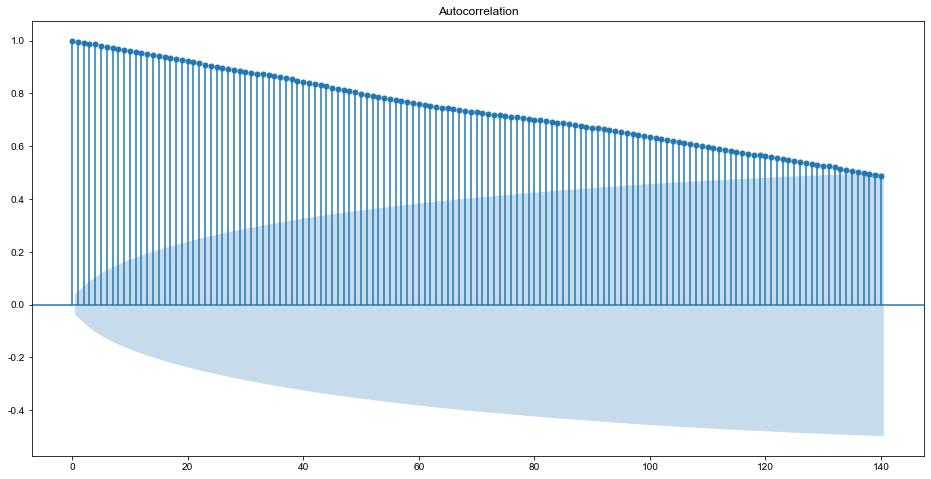

In [9]:
from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
def dickey(df):
    t = stattools.adfuller(df)
    output = pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
    output['value']['Test Statistic Value'] = t[0]
    output['value']['p-value'] = t[1]
    output['value']['Lags Used'] = t[2]
    output['value']['Number of Observations Used'] = t[3]
    output['value']['Critical Value(1%)'] = t[4]['1%']
    output['value']['Critical Value(5%)'] = t[4]['5%']
    output['value']['Critical Value(10%)'] = t[4]['10%']
    return output
fig, ax = plt.subplots(figsize=(16,8))
tsaplots.plot_acf(share["开盘"], lags=140, ax=ax)
stattools.acf(share["开盘"], nlags=140)

140阶进入置信区间
## 偏自相关性

array([ 1.00000000e+00,  9.96718731e-01, -2.32907755e-03,  2.96078328e-02,
       -2.37983145e-03, -8.37884995e-02,  1.09836343e-02,  4.55515329e-02,
       -6.02794853e-02, -4.62048085e-02, -1.63461573e-02,  6.33247860e-02,
        3.67248700e-02, -2.86172617e-02, -2.15747390e-02,  3.10064560e-02,
       -4.97091898e-04, -1.05559852e-02, -3.87570593e-02,  1.81785465e-02,
        1.10627529e-02, -8.03819340e-02, -4.39512693e-02,  2.11125868e-02,
        7.52870479e-02,  3.61297852e-02, -2.75136822e-02, -1.53295595e-02,
        3.75806259e-02, -3.71351606e-03, -8.34947207e-03,  2.28635563e-02,
        3.19489607e-02,  3.38875374e-02, -5.92383882e-02, -5.26532189e-02,
       -1.96598786e-02, -4.70856584e-02,  5.24384290e-02, -1.29081350e-02,
        1.96000344e-02, -4.90053037e-02, -3.66487876e-02, -6.92356732e-02,
       -4.25515227e-02,  2.97052571e-03,  5.12470842e-02,  3.38512615e-02,
        3.34633404e-03, -3.21288352e-02,  4.17796798e-02,  3.13104250e-02,
       -4.63205969e-03,  

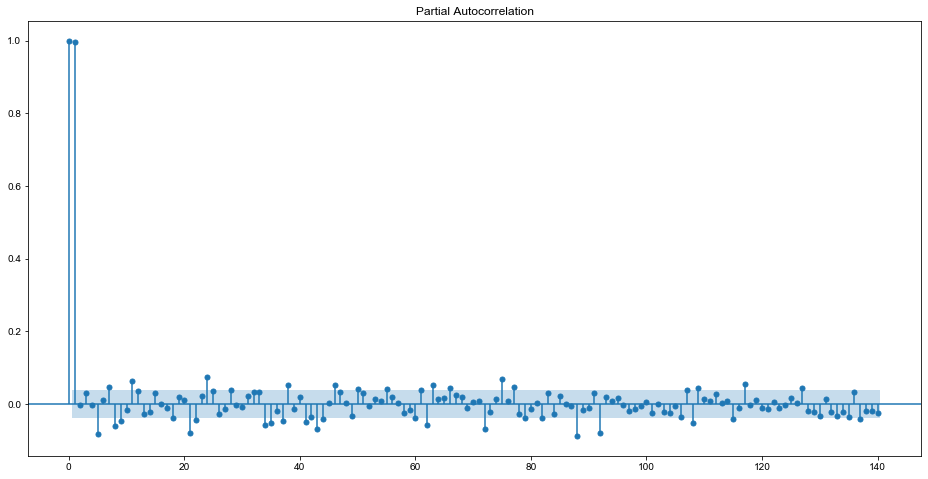

In [10]:
fig, ax = plt.subplots(figsize=(16,8))
tsaplots.plot_pacf(share["开盘"], lags=140, ax=ax)
stattools.pacf(share["开盘"], nlags=140)

In [11]:
dickey(share["开盘"])

,value
Test Statistic Value,-1.918901
p-value,0.323222
Lags Used,25
Number of Observations Used,2422
Critical Value(1%),-3.433053
Critical Value(5%),-2.862734
Critical Value(10%),-2.567406


1. 看P-value是否非常接近0
2. Test Statistic Value要小于Critical Value


本数据中，P-value 为 0.323222，不够接近0


adf结果为-1.918901， 大于三个level(1%、5%、10%)的统计值(-3.433053, -2.862734, -2.567406)


本数据不平稳！


# 统计间隔变长

## 一周

In [12]:
combination = pd.Grouper(key='date', freq='1W') # 混合器，按照date列的1周合并
week = pd.DataFrame({'date': share.index, 'share':share['开盘']})
week = week.groupby(combination).agg({'share': 'sum'}) # 合并之后记录count(总量)
week

,share
date,
2011-06-19,13448.59
2011-06-26,13231.09
2011-07-03,13761.72
2011-07-10,14005.70
2011-07-17,13930.99
...,...
2021-06-06,17995.89
2021-06-13,17974.33
2021-06-20,14173.00


<AxesSubplot:xlabel='date'>

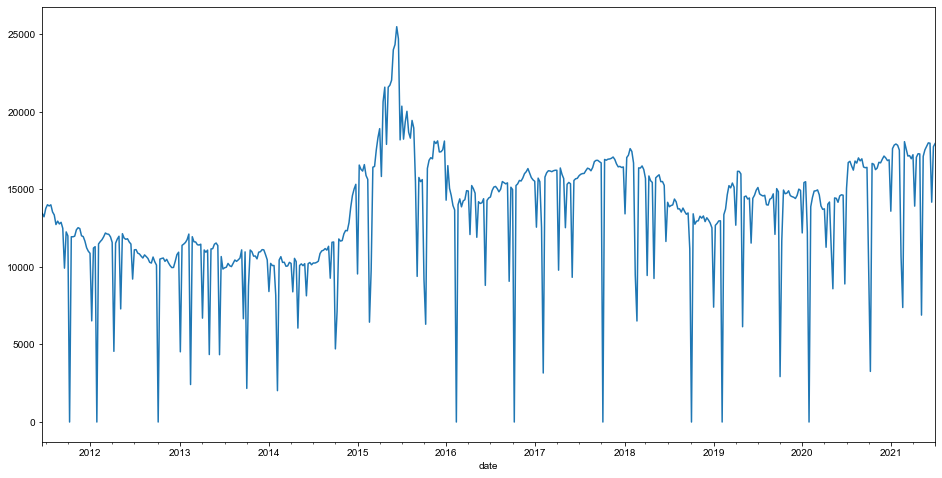

In [13]:
week['share'].plot(figsize=(16,8))

周期性非常明显，并不合适做分析

# 月频率

In [14]:
combination = pd.Grouper(key='date', freq='M') # 混合器，按照date列的1月合并
month = pd.DataFrame({'date': share.index, 'share':share['开盘']})
month = month.groupby(combination).agg({'share': 'sum'}) # 合并之后记录count(总量)
month

,share
date,
2011-06-30,37673.57
2011-07-31,58250.79
2011-08-31,59558.76
2011-09-30,51786.07
2011-10-31,38336.45
...,...
2021-03-31,79219.82
2021-04-30,72485.16
2021-05-31,62936.76


<AxesSubplot:xlabel='date'>

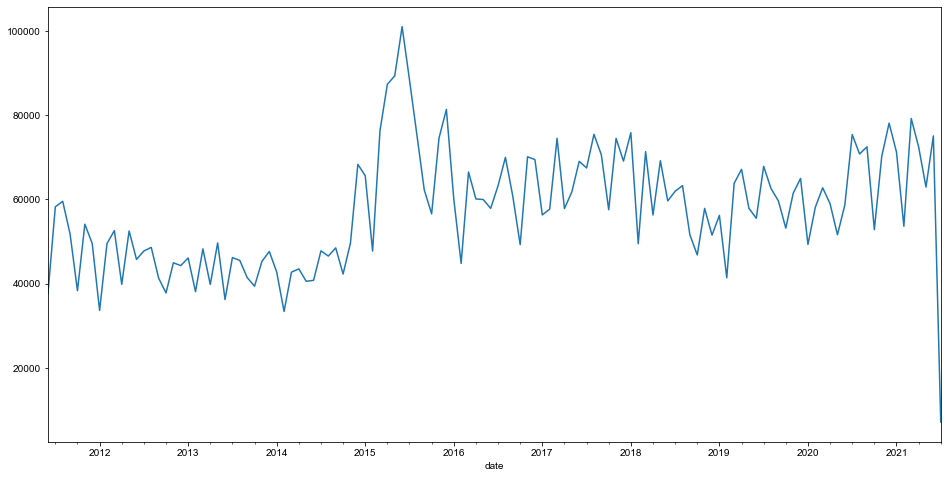

In [15]:
month['share'].plot(figsize=(16,8))

/Users/thales/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([1.        , 0.52709869, 0.46267649, 0.48037712, 0.48287279,
       0.41034361, 0.32593281, 0.27128993, 0.29985904, 0.23632939,
       0.10921461, 0.13684023, 0.22664869])

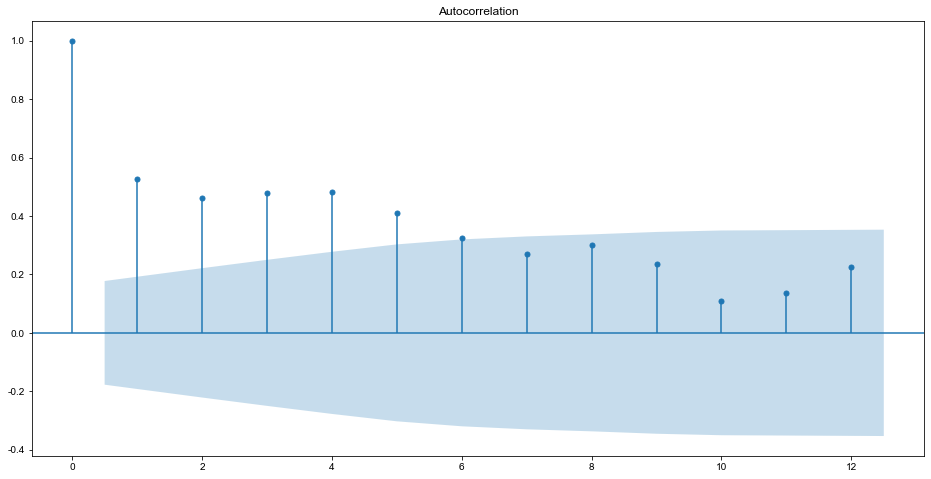

In [16]:
fig, ax = plt.subplots(figsize=(16,8))
tsaplots.plot_acf(month['share'], lags=12, ax=ax)
stattools.acf(month['share'], nlags=12)

6阶进入置信区间，相对平稳

array([ 1.00000000e+00,  5.15467689e-01,  2.16739093e-01,  2.30129763e-01,
        1.75227505e-01,  9.60696171e-02,  1.05798095e-01,  7.14557488e-02,
        4.03777609e-02,  3.16423027e-02,  5.56547885e-02,  3.15289212e-02,
        6.81315179e-02,  1.01819173e-01,  4.70298726e-03, -1.77324937e-02,
        1.31329171e-02,  1.86004335e-01,  5.23046088e-02,  4.82432061e-02,
       -5.16475641e-03, -6.71717168e-02,  4.17639753e-02, -7.57292563e-02,
       -8.76015539e-02, -5.41333937e-02,  1.71387266e-01, -7.56605178e-02,
       -3.69299454e-02, -7.02241480e-02,  7.69801122e-02, -9.16977292e-03,
       -4.14003440e-02,  1.19140121e-02,  4.99522586e-02, -7.09418171e-03,
       -7.80106186e-02, -1.03266616e-01, -6.16642691e-02,  3.49691357e-02,
       -1.21730889e-02,  3.81945072e-03, -3.41233215e-02, -7.19049522e-02,
        1.52192179e-02,  3.10406580e-02, -6.39607706e-04, -5.12343562e-03,
       -3.41668307e-04,  3.21094516e-02,  7.19252331e-02,  1.24799433e-01,
        2.35067714e-01, -

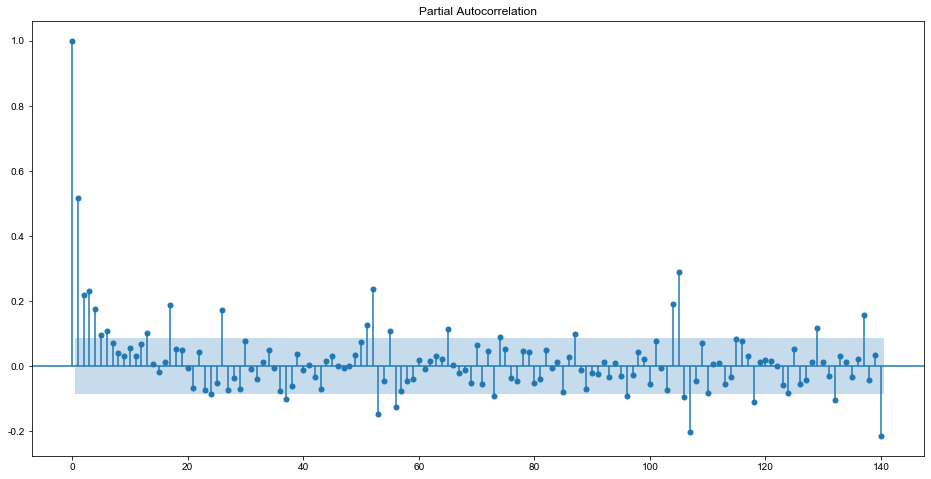

In [17]:
fig, ax = plt.subplots(figsize=(16,8))
tsaplots.plot_pacf(week, lags=140, ax=ax)
stattools.pacf(week, nlags=140)

In [18]:
dickey(month)

,value
Test Statistic Value,-2.143397
p-value,0.227426
Lags Used,3
Number of Observations Used,118
Critical Value(1%),-3.487022
Critical Value(5%),-2.886363
Critical Value(10%),-2.580009


月报平稳性相对好了一些


# 季报

In [19]:
combination = pd.Grouper(key='date', freq='3M') # 混合器，按照date列的1月合并
season = pd.DataFrame({'date': share.index, 'share':share['开盘']})
season = season.groupby(combination).agg({'share': 'sum'}) # 合并之后记录count(总量)
season

,share
date,
2011-06-30,37673.57
2011-09-30,169595.62
2011-12-31,142000.75
2012-03-31,135773.00
2012-06-30,138140.49
2012-09-30,137722.97
2012-12-31,127068.02
2013-03-31,132501.49
2013-06-30,125750.23


最后一个数据不足一个季度，会影响计算，需要去除

<AxesSubplot:xlabel='date'>

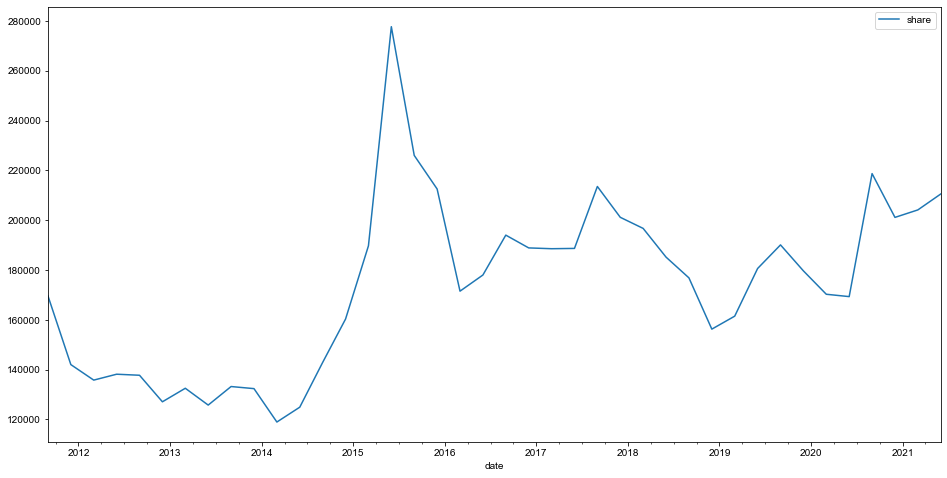

In [20]:
season = season[1:-1]
season.plot(figsize=(16,8))

/Users/thales/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        ,  0.76683363,  0.5530178 ,  0.34755354,  0.22554729,
        0.16862108,  0.11713683,  0.0788324 ,  0.03479248,  0.01237466,
       -0.06152677, -0.08692839, -0.15323236])

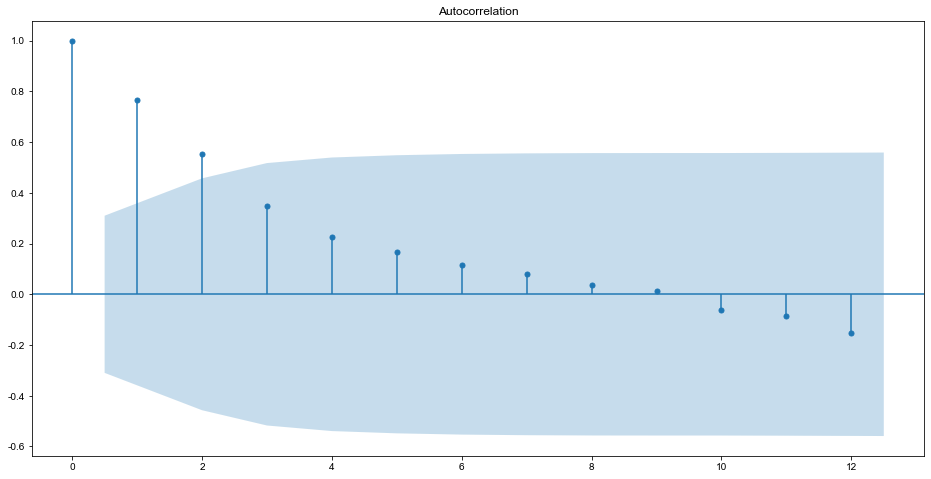

In [21]:
fig, ax = plt.subplots(figsize=(16,8))
tsaplots.plot_acf(season, lags=12, ax=ax)
stattools.acf(season, nlags=12)

array([ 1.        ,  0.78649603, -0.09556819, -0.13413603,  0.06875673,
        0.07756615, -0.06631423, -0.01344627, -0.03272497,  0.02302927,
       -0.22722367,  0.07206989, -0.21009852])

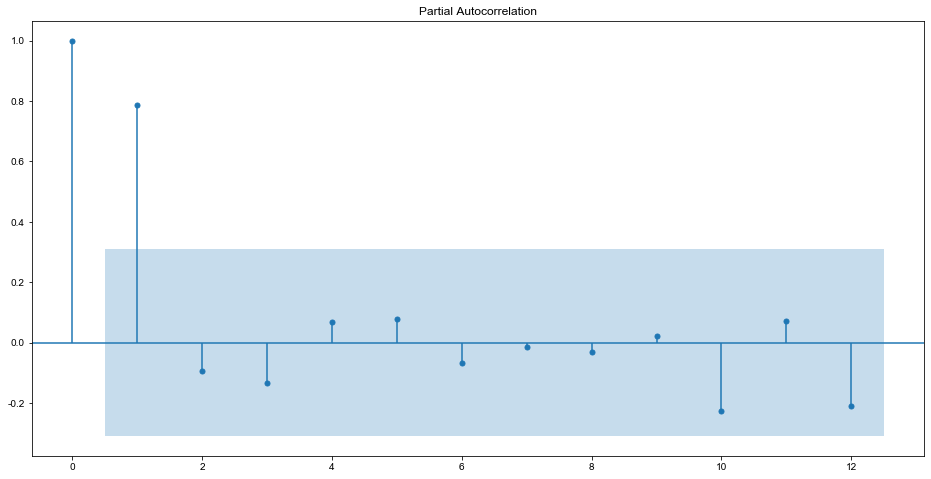

In [22]:
fig, ax = plt.subplots(figsize=(16,8))
tsaplots.plot_pacf(season, lags=12, ax=ax)
stattools.pacf(season, nlags=12)

In [23]:
dickey(season)

,value
Test Statistic Value,-2.00146
p-value,0.285933
Lags Used,0
Number of Observations Used,39
Critical Value(1%),-3.6104
Critical Value(5%),-2.939109
Critical Value(10%),-2.608063


季报并没有比月报好多少，应该还是季节影响比较大


# 差分


因为数据不够平稳，所以我们是用差分

,value
Test Statistic Value,-9.059219
p-value,0.0
Lags Used,2
Number of Observations Used,118
Critical Value(1%),-3.487022
Critical Value(5%),-2.886363
Critical Value(10%),-2.580009


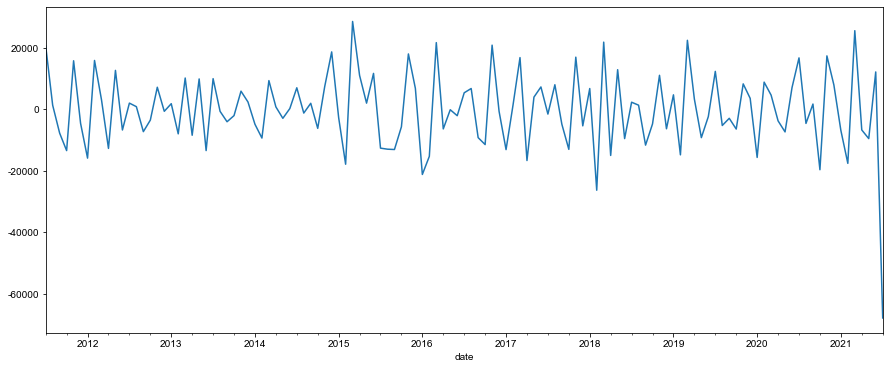

In [25]:
diff = month['share'].diff().dropna()
diff.plot(figsize=(15, 6))
dickey(diff)

差分之后非常平稳